# Paytm Interview WebLog Challenge | Submitted by Saurav Kaushik

## Importing required libraries

In [1]:
import wget
import gzip
import pandas as pd
import numpy as np
import datetime
import time
from tqdm import tqdm 
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Downloading the challange data

In [2]:
#wget.download("https://raw.githubusercontent.com/PaytmLabs/WeblogChallenge/master/data/2015_07_22_mktplace_shop_web_log_sample.log.gz")


## Reading the challange data using pandas

In [3]:
data = pd.read_csv("C:/Users/dell/Downloads/2015_07_22_mktplace_shop_web_log_sample.log.gz", compression="gzip", sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])', engine = "python", header = None, names = ['timestamp', 'elb', 'client:port', 'backend:port', 'request_processing_time', 'backend_processing_time', 'response_processing_time', 'elb_status_code', 'backend_status_code', 'received_bytes', 'sent_bytes', 'request', 'user_agent', 'ssl_cipher', 'ssl_protocol'])

In [4]:
data.head(10)

,timestamp,elb,client:port,backend:port,request_processing_time,backend_processing_time,response_processing_time,elb_status_code,backend_status_code,received_bytes,sent_bytes,request,user_agent,ssl_cipher,ssl_protocol
0,2015-07-22T09:00:28.019143Z,marketpalce-shop,123.242.248.130:54635,10.0.6.158:80,0.000022,0.026109,0.000020,200.0,200.0,0.0,699.0,"""GET https://paytm.com:443/shop/authresponse?c...","""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2
1,2015-07-22T09:00:27.894580Z,marketpalce-shop,203.91.211.44:51402,10.0.4.150:80,0.000024,0.153340,0.000026,200.0,200.0,0.0,1497.0,"""GET https://paytm.com:443/shop/wallet/txnhist...","""Mozilla/5.0 (Windows NT 6.1; rv:39.0) Gecko/2...",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2
2,2015-07-22T09:00:27.885745Z,marketpalce-shop,1.39.32.179:56419,10.0.4.244:80,0.000024,0.164958,0.000017,200.0,200.0,0.0,157.0,"""GET https://paytm.com:443/shop/wallet/txnhist...","""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2
3,2015-07-22T09:00:28.048369Z,marketpalce-shop,180.179.213.94:48725,10.0.6.108:80,0.00002,0.002333,0.000021,200.0,200.0,0.0,35734.0,"""GET https://paytm.com:443/shop/p/micromax-yu-...","""-""",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2
4,2015-07-22T09:00:28.036251Z,marketpalce-shop,120.59.192.208:13527,10.0.4.217:80,0.000024,0.015091,0.000016,200.0,200.0,68.0,640.0,"""POST https://paytm.com:443/papi/v1/expresscar...","""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2
5,2015-07-22T09:00:28.033793Z,marketpalce-shop,117.239.195.66:50524,10.0.6.195:80,0.000024,0.021570,0.000021,200.0,200.0,0.0,60.0,"""GET https://paytm.com:443/api/user/favourite?...","""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2
6,2015-07-22T09:00:28.055029Z,marketpalce-shop,101.60.186.26:33177,10.0.4.244:80,0.00002,0.001098,0.000022,200.0,200.0,0.0,1150.0,"""GET https://paytm.com:443/favicon.ico HTTP/1.1""","""Mozilla/5.0 (Windows NT 6.3; rv:27.0) Gecko/2...",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2
7,2015-07-22T09:00:28.050298Z,marketpalce-shop,59.183.41.47:62014,10.0.4.227:80,0.000021,0.008161,0.000021,200.0,200.0,0.0,72.0,"""GET https://paytm.com:443/papi/rr/products/69...","""Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebK...",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2
8,2015-07-22T09:00:28.059081Z,marketpalce-shop,117.239.195.66:50538,10.0.4.227:80,0.000019,0.001035,0.000021,200.0,200.0,0.0,396.0,"""GET https://paytm.com:443/images/greyStar.png...","""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2
9,2015-07-22T09:00:28.054939Z,marketpalce-shop,183.83.237.83:49687,10.0.6.108:80,0.000023,0.008762,0.000021,200.0,200.0,0.0,214.0,"""GET https://paytm.com:443/shop/cart?channel=w...","""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2


## Looking at the data Types

In [5]:
data.dtypes

timestamp                    object
elb                          object
client:port                  object
backend:port                 object
request_processing_time      object
backend_processing_time     float64
response_processing_time    float64
elb_status_code             float64
backend_status_code         float64
received_bytes              float64
sent_bytes                  float64
request                      object
user_agent                   object
ssl_cipher                   object
ssl_protocol                 object
dtype: object

## Missing data?

In [6]:
data.isnull().sum()

timestamp                    0
elb                          0
client:port                  0
backend:port                 0
request_processing_time     10
backend_processing_time     22
response_processing_time    22
elb_status_code             22
backend_status_code         22
received_bytes              22
sent_bytes                  22
request                     22
user_agent                  22
ssl_cipher                  22
ssl_protocol                22
dtype: int64

In [7]:
data.shape

(1158500, 15)

### Since only 22 data points are missing out of 1158500 total, therefore, let's remove these data points. Also, these 22 are supposedly redundant i.e. same data point have 10 features missing. Let's check it out

In [8]:
data[data.ssl_protocol.isnull()]

,timestamp,elb,client:port,backend:port,request_processing_time,backend_processing_time,response_processing_time,elb_status_code,backend_status_code,received_bytes,sent_bytes,request,user_agent,ssl_cipher,ssl_protocol
491257,2015-07-22T16:10:38.028609Z marketpalce-shop 1...,"""Mozilla/5.0 (compatible; MSIE 9.0; Windows NT...",DHE-RSA-AES128-SHA,TLSv1,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
491609,2015-07-22T16:10:38.797746Z marketpalce-shop 1...,"""Mozilla/5.0 (compatible; MSIE 9.0; Windows NT...",DHE-RSA-AES128-SHA,TLSv1,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
491948,2015-07-22T16:10:39.576333Z marketpalce-shop 1...,"""Mozilla/5.0 (compatible; MSIE 9.0; Windows NT...",DHE-RSA-AES128-SHA,TLSv1,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
492269,2015-07-22T16:10:40.331390Z marketpalce-shop 1...,"""Mozilla/5.0 (compatible; MSIE 9.0; Windows NT...",DHE-RSA-AES128-SHA,TLSv1,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
492550,2015-07-22T16:10:41.105558Z marketpalce-shop 1...,"""Mozilla/5.0 (compatible; MSIE 9.0; Windows NT...",DHE-RSA-AES128-SHA,TLSv1,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
492801,2015-07-22T16:10:41.692252Z marketpalce-shop 1...,"""Mozilla/5.0 (compatible; MSIE 9.0; Windows NT...",DHE-RSA-AES128-SHA,TLSv1,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
493231,2015-07-22T16:10:42.898126Z marketpalce-shop 1...,"""Mozilla/5.0 (compatible; MSIE 9.0; Windows NT...",DHE-RSA-AES128-SHA,TLSv1,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
496261,2015-07-22T16:10:50.873283Z marketpalce-shop 1...,"http://paytm.com:80/%27""()&%251%3CScRiPt%20%3E...","""Mozilla/5.0 (compatible; MSIE 9.0; Windows NT...",-,-,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
496278,2015-07-22T16:10:50.917039Z marketpalce-shop 1...,"https://paytm.com:443/'""()&%251<ScRiPt%20>prom...","""Mozilla/5.0 (compatible; MSIE 9.0; Windows NT...",DHE-RSA-AES128-SHA,TLSv1,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
496681,2015-07-22T16:10:51.693786Z marketpalce-shop 1...,"http://paytm.com:80/%27""()&%251%3CScRiPt%20%3E...","""Mozilla/5.0 (compatible; MSIE 9.0; Windows NT...",-,-,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None


### We were right. It can easily happen in a real world scenario and since the proportion is neglegiable, we need not take any action from the current api functioning point of view as well as we can simlpy remove these 22 data points.

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

timestamp                   0
elb                         0
client:port                 0
backend:port                0
request_processing_time     0
backend_processing_time     0
response_processing_time    0
elb_status_code             0
backend_status_code         0
received_bytes              0
sent_bytes                  0
request                     0
user_agent                  0
ssl_cipher                  0
ssl_protocol                0
dtype: int64

## Correcting the data types

In [11]:
pd.to_datetime(data.timestamp[1]).isoformat(' ')

'2015-07-22 09:00:27.894580'

In [12]:
pd.to_datetime(pd.to_datetime(data.timestamp[1]).isoformat(' ')).isocalendar()


(2015, 30, 3)

In [13]:
pd.to_datetime(pd.to_datetime(data.timestamp[1]).isoformat(' ')).strftime("%Y-%m-%d %H:%M:%S")


'2015-07-22 09:00:27'

In [14]:
pd.to_datetime(pd.to_datetime(data.timestamp[1]).isoformat(' ')).timetuple()

time.struct_time(tm_year=2015, tm_mon=7, tm_mday=22, tm_hour=9, tm_min=0, tm_sec=27, tm_wday=2, tm_yday=203, tm_isdst=-1)

In [15]:
pd.to_datetime(pd.to_datetime(data.timestamp[1]).isoformat(' ')).timetuple().tm_hour

9

In [16]:
data.timestamp[1]

'2015-07-22T09:00:27.894580Z'

In [17]:

data['timestamp2'] = pd.to_datetime(data['timestamp']).apply(lambda x: pd.to_datetime(x.isoformat()).strftime("%Y-%m-%d %H:%M:%S"))


In [18]:
data.timestamp = pd.to_datetime(data.timestamp2)

In [19]:
data.head(10)

,timestamp,elb,client:port,backend:port,request_processing_time,backend_processing_time,response_processing_time,elb_status_code,backend_status_code,received_bytes,sent_bytes,request,user_agent,ssl_cipher,ssl_protocol,timestamp2
0,2015-07-22 09:00:28,marketpalce-shop,123.242.248.130:54635,10.0.6.158:80,0.000022,0.026109,0.000020,200.0,200.0,0.0,699.0,"""GET https://paytm.com:443/shop/authresponse?c...","""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 09:00:28
1,2015-07-22 09:00:27,marketpalce-shop,203.91.211.44:51402,10.0.4.150:80,0.000024,0.153340,0.000026,200.0,200.0,0.0,1497.0,"""GET https://paytm.com:443/shop/wallet/txnhist...","""Mozilla/5.0 (Windows NT 6.1; rv:39.0) Gecko/2...",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 09:00:27
2,2015-07-22 09:00:27,marketpalce-shop,1.39.32.179:56419,10.0.4.244:80,0.000024,0.164958,0.000017,200.0,200.0,0.0,157.0,"""GET https://paytm.com:443/shop/wallet/txnhist...","""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 09:00:27
3,2015-07-22 09:00:28,marketpalce-shop,180.179.213.94:48725,10.0.6.108:80,0.00002,0.002333,0.000021,200.0,200.0,0.0,35734.0,"""GET https://paytm.com:443/shop/p/micromax-yu-...","""-""",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 09:00:28
4,2015-07-22 09:00:28,marketpalce-shop,120.59.192.208:13527,10.0.4.217:80,0.000024,0.015091,0.000016,200.0,200.0,68.0,640.0,"""POST https://paytm.com:443/papi/v1/expresscar...","""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 09:00:28
5,2015-07-22 09:00:28,marketpalce-shop,117.239.195.66:50524,10.0.6.195:80,0.000024,0.021570,0.000021,200.0,200.0,0.0,60.0,"""GET https://paytm.com:443/api/user/favourite?...","""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 09:00:28
6,2015-07-22 09:00:28,marketpalce-shop,101.60.186.26:33177,10.0.4.244:80,0.00002,0.001098,0.000022,200.0,200.0,0.0,1150.0,"""GET https://paytm.com:443/favicon.ico HTTP/1.1""","""Mozilla/5.0 (Windows NT 6.3; rv:27.0) Gecko/2...",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 09:00:28
7,2015-07-22 09:00:28,marketpalce-shop,59.183.41.47:62014,10.0.4.227:80,0.000021,0.008161,0.000021,200.0,200.0,0.0,72.0,"""GET https://paytm.com:443/papi/rr/products/69...","""Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebK...",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 09:00:28
8,2015-07-22 09:00:28,marketpalce-shop,117.239.195.66:50538,10.0.4.227:80,0.000019,0.001035,0.000021,200.0,200.0,0.0,396.0,"""GET https://paytm.com:443/images/greyStar.png...","""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 09:00:28
9,2015-07-22 09:00:28,marketpalce-shop,183.83.237.83:49687,10.0.6.108:80,0.000023,0.008762,0.000021,200.0,200.0,0.0,214.0,"""GET https://paytm.com:443/shop/cart?channel=w...","""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 09:00:28


In [20]:
data.dtypes

timestamp                   datetime64[ns]
elb                                 object
client:port                         object
backend:port                        object
request_processing_time             object
backend_processing_time            float64
response_processing_time           float64
elb_status_code                    float64
backend_status_code                float64
received_bytes                     float64
sent_bytes                         float64
request                             object
user_agent                          object
ssl_cipher                          object
ssl_protocol                        object
timestamp2                          object
dtype: object

In [21]:
print('Date Range: ' + str(data.timestamp.min()) + ' to ' + str(data.timestamp.max()))

print('Total time duration, data is recorded for: ' + str(data.timestamp.max()-data.timestamp.min()))

Date Range: 2015-07-22 02:40:06 to 2015-07-22 21:10:27
Total time duration, data is recorded for: 0 days 18:30:21


# 1. Problem Statements | Processing & Analytical goals:


## 1.A Sessionize the web log by IP. Sessionize = aggregrate all page hits by visitor/IP during a fixed time window. https://en.wikipedia.org/wiki/Session (web_analytics)  


### Let's use the fixed time window of 30 minutes which is also the mot popular standard

In [22]:
#Creating the client IP feature
data['client_IP'] = data['client:port'].apply(lambda x: str(x).split(':', 1)[0])


In [23]:
#Sorting data by timestamp
data.sort_values(by='timestamp',inplace=True)
data.reset_index(drop=True,inplace = True)

In [24]:
#grp = data.groupby('client_IP')
#data.drop('timestamp2',axis=1,inplace=True)
#pd.to_timedelta(pd.to_datetime(data.groupby('client_IP').timestamp.shift(0))-pd.to_datetime(data.groupby('client_IP').timestamp.shift(1)))
#(data.groupby('client_IP').timestamp.shift(0)-data.groupby('client_IP').timestamp.shift(1))


In [25]:
data.head(20)

,timestamp,elb,client:port,backend:port,request_processing_time,backend_processing_time,response_processing_time,elb_status_code,backend_status_code,received_bytes,sent_bytes,request,user_agent,ssl_cipher,ssl_protocol,timestamp2,client_IP
0,2015-07-22 02:40:06,marketpalce-shop,116.75.106.232:62245,10.0.4.244:80,0.000025,0.009639,0.000024,200.0,200.0,0.0,214.0,"""GET https://paytm.com:443/shop/cart?channel=w...","""Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebK...",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 02:40:06,116.75.106.232
1,2015-07-22 02:40:06,marketpalce-shop,223.176.39.150:61061,10.0.4.227:80,0.000027,0.157711,0.000024,200.0,200.0,70.0,772.0,"""POST https://paytm.com:443/checkout HTTP/1.1""","""Mozilla/5.0 (SymbianOS/9.4; Series60/5.0 Noki...",AES128-SHA,TLSv1,2015-07-22 02:40:06,223.176.39.150
2,2015-07-22 02:40:06,marketpalce-shop,119.81.61.166:44978,10.0.4.176:80,0.000021,0.009893,0.000023,200.0,200.0,0.0,12.0,"""GET https://paytm.com:443/papi//v1/promosearc...","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3...",DHE-RSA-AES128-SHA,TLSv1,2015-07-22 02:40:06,119.81.61.166
3,2015-07-22 02:40:06,marketpalce-shop,52.74.219.71:43941,10.0.6.178:80,0.00002,0.011047,0.000025,200.0,200.0,0.0,576.0,"""GET https://paytm.com:443/papi/v1/promosearch...","""-""",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 02:40:06,52.74.219.71
4,2015-07-22 02:40:06,marketpalce-shop,106.78.125.179:30672,10.0.4.150:80,0.000024,0.242662,0.000021,200.0,200.0,0.0,212.0,"""GET https://paytm.com:443/shop/wallet/balance...","""Mozilla/5.0 (Windows NT 6.1; rv:25.0) Gecko/2...",ECDHE-RSA-AES128-SHA,TLSv1,2015-07-22 02:40:06,106.78.125.179
5,2015-07-22 02:40:06,marketpalce-shop,119.81.61.166:44968,10.0.6.158:80,0.000021,0.012208,0.000023,200.0,200.0,0.0,1147.0,"""GET https://paytm.com:443/papi//v1/promosearc...","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3...",DHE-RSA-AES128-SHA,TLSv1,2015-07-22 02:40:06,119.81.61.166
6,2015-07-22 02:40:06,marketpalce-shop,119.81.61.166:44959,10.0.6.199:80,0.000021,0.007044,0.000024,200.0,200.0,0.0,576.0,"""GET https://paytm.com:443/papi//v1/promosearc...","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3...",DHE-RSA-AES128-SHA,TLSv1,2015-07-22 02:40:06,119.81.61.166
7,2015-07-22 02:40:06,marketpalce-shop,49.156.68.161:6562,10.0.4.225:80,0.000025,0.003445,0.000031,200.0,200.0,0.0,20841.0,"""GET https://paytm.com:443/offer/wp-content/up...","""Mozilla/5.0 (Linux; U; Android 4.1.1; en-in; ...",ECDHE-RSA-AES128-SHA,TLSv1,2015-07-22 02:40:06,49.156.68.161
8,2015-07-22 02:40:06,marketpalce-shop,155.136.184.7:11388,10.0.6.108:80,0.00002,0.000763,0.000025,304.0,304.0,0.0,0.0,"""GET https://paytm.com:443/offer/wp-content/up...","""Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537....",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 02:40:06,155.136.184.7
9,2015-07-22 02:40:06,marketpalce-shop,122.172.38.214:21467,10.0.4.217:80,0.000023,0.027186,0.000023,302.0,302.0,0.0,17.0,"""GET https://paytm.com:443/shop/v1/frequentord...","""Mozilla/5.0 (Windows NT 6.1; WOW64; rv:39.0) ...",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 02:40:06,122.172.38.214


In [26]:
#data['client_IP'] = data['client_IP'].astype('category')

#Mins and Secs
#data['diff_mins'] = ((data.groupby('client_IP').timestamp-data.groupby('client_IP').timestamp.shift(1)).total_seconds())/60
#data['ts_diff'] = (pd.to_datetime(data.groupby('client_IP').timestamp.shift(0)) - pd.to_datetime(data.groupby('client_IP').timestamp.shift(1))).total_seconds()/6
data['ts_diff_mins'] = data.groupby('client_IP')['timestamp'].apply(lambda x: (x.shift(0) - x.shift(1))).apply(lambda x: x.total_seconds())/60
data['ts_diff_mins'].fillna(0, inplace = True)

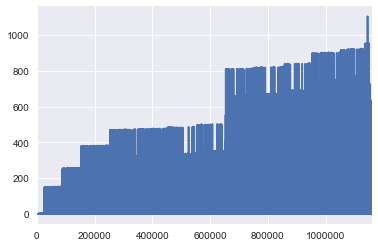

In [27]:
data.ts_diff_mins.plot()

In [28]:
data.head(20)

,timestamp,elb,client:port,backend:port,request_processing_time,backend_processing_time,response_processing_time,elb_status_code,backend_status_code,received_bytes,sent_bytes,request,user_agent,ssl_cipher,ssl_protocol,timestamp2,client_IP,ts_diff_mins
0,2015-07-22 02:40:06,marketpalce-shop,116.75.106.232:62245,10.0.4.244:80,0.000025,0.009639,0.000024,200.0,200.0,0.0,214.0,"""GET https://paytm.com:443/shop/cart?channel=w...","""Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebK...",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 02:40:06,116.75.106.232,0.0
1,2015-07-22 02:40:06,marketpalce-shop,223.176.39.150:61061,10.0.4.227:80,0.000027,0.157711,0.000024,200.0,200.0,70.0,772.0,"""POST https://paytm.com:443/checkout HTTP/1.1""","""Mozilla/5.0 (SymbianOS/9.4; Series60/5.0 Noki...",AES128-SHA,TLSv1,2015-07-22 02:40:06,223.176.39.150,0.0
2,2015-07-22 02:40:06,marketpalce-shop,119.81.61.166:44978,10.0.4.176:80,0.000021,0.009893,0.000023,200.0,200.0,0.0,12.0,"""GET https://paytm.com:443/papi//v1/promosearc...","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3...",DHE-RSA-AES128-SHA,TLSv1,2015-07-22 02:40:06,119.81.61.166,0.0
3,2015-07-22 02:40:06,marketpalce-shop,52.74.219.71:43941,10.0.6.178:80,0.00002,0.011047,0.000025,200.0,200.0,0.0,576.0,"""GET https://paytm.com:443/papi/v1/promosearch...","""-""",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 02:40:06,52.74.219.71,0.0
4,2015-07-22 02:40:06,marketpalce-shop,106.78.125.179:30672,10.0.4.150:80,0.000024,0.242662,0.000021,200.0,200.0,0.0,212.0,"""GET https://paytm.com:443/shop/wallet/balance...","""Mozilla/5.0 (Windows NT 6.1; rv:25.0) Gecko/2...",ECDHE-RSA-AES128-SHA,TLSv1,2015-07-22 02:40:06,106.78.125.179,0.0
5,2015-07-22 02:40:06,marketpalce-shop,119.81.61.166:44968,10.0.6.158:80,0.000021,0.012208,0.000023,200.0,200.0,0.0,1147.0,"""GET https://paytm.com:443/papi//v1/promosearc...","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3...",DHE-RSA-AES128-SHA,TLSv1,2015-07-22 02:40:06,119.81.61.166,0.0
6,2015-07-22 02:40:06,marketpalce-shop,119.81.61.166:44959,10.0.6.199:80,0.000021,0.007044,0.000024,200.0,200.0,0.0,576.0,"""GET https://paytm.com:443/papi//v1/promosearc...","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3...",DHE-RSA-AES128-SHA,TLSv1,2015-07-22 02:40:06,119.81.61.166,0.0
7,2015-07-22 02:40:06,marketpalce-shop,49.156.68.161:6562,10.0.4.225:80,0.000025,0.003445,0.000031,200.0,200.0,0.0,20841.0,"""GET https://paytm.com:443/offer/wp-content/up...","""Mozilla/5.0 (Linux; U; Android 4.1.1; en-in; ...",ECDHE-RSA-AES128-SHA,TLSv1,2015-07-22 02:40:06,49.156.68.161,0.0
8,2015-07-22 02:40:06,marketpalce-shop,155.136.184.7:11388,10.0.6.108:80,0.00002,0.000763,0.000025,304.0,304.0,0.0,0.0,"""GET https://paytm.com:443/offer/wp-content/up...","""Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537....",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 02:40:06,155.136.184.7,0.0
9,2015-07-22 02:40:06,marketpalce-shop,122.172.38.214:21467,10.0.4.217:80,0.000023,0.027186,0.000023,302.0,302.0,0.0,17.0,"""GET https://paytm.com:443/shop/v1/frequentord...","""Mozilla/5.0 (Windows NT 6.1; WOW64; rv:39.0) ...",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 02:40:06,122.172.38.214,0.0


In [29]:
#data.groupby('client_IP')['timestamp'].apply(lambda x: (x.shift(0) - x.shift(1) > '00:30:00').fillna(0).cumsum(skipna=False))

data['session_number'] = data.groupby('client_IP')['ts_diff_mins'].apply(lambda x: (x> 30).fillna(0).cumsum(skipna=False))


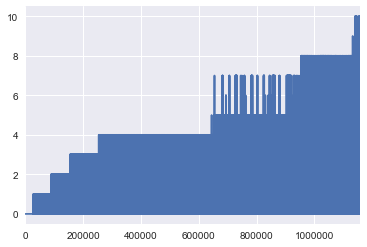

In [30]:
#No. of sessions with time. Remember, data was ealier sorted with timestamp, therefore, x-axis represents the timestamp 
data.session_number.plot()


In [31]:
print("So, there were a total of " + str(data.groupby('client_IP').session_number.max().sum()) + " sessions in the given time period of " 
      + str(data.timestamp.max()-data.timestamp.min()) + " from Date Range: " + str(data.timestamp.min()) + " to " + str(data.timestamp.max()))


So, there were a total of 15203 sessions in the given time period of 0 days 18:30:21 from Date Range: 2015-07-22 02:40:06 to 2015-07-22 21:10:27


## 1.B Determine the average session time

### The distribution of the session time is as:

(array([  1.14355700e+06,   5.21600000e+03,   1.36000000e+03,
          8.94000000e+02,   9.88000000e+02,   1.83200000e+03,
          1.92300000e+03,   1.05800000e+03,   4.43000000e+02,
          2.43000000e+02,   2.78000000e+02,   2.08000000e+02,
          1.83000000e+02,   1.05000000e+02,   9.40000000e+01,
          3.30000000e+01,   5.60000000e+01,   6.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([    0.        ,    55.24916667,   110.49833333,   165.7475    ,
          220.99666667,   276.24583333,   331.495     ,   386.74416667,
          441.99333333,   497.2425    ,   552.49166667,   607.74083333,
          662.99      ,   718.23916667,   773.48833333,   828.7375    ,
          883.98666667,   939.23583333,   994.485     ,  1049.73416667,
         1104.98333333]),
 <a list of 20 Patch objects>)

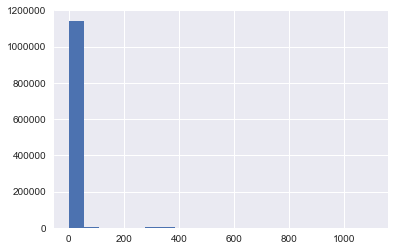

In [32]:
plt.hist(data.ts_diff_mins,bins=20)

In [33]:
print("The average session time" + " in the given time period of " 
      + str(data.timestamp.max()-data.timestamp.min()) + " from Date Range: " + str(data.timestamp.min()) + " to " + str(data.timestamp.max())
      + " is " + str(data.groupby(['client_IP','session_number']).ts_diff_mins.mean().mean()) + " minutes.")


The average session time in the given time period of 0 days 18:30:21 from Date Range: 2015-07-22 02:40:06 to 2015-07-22 21:10:27 is 11.723243916617266 minutes.


## 1.C Determine unique URL visits per session. To clarify, count a hit to a unique URL only once per session.


### Extracting the url from the request feild.

In [34]:
data['url'] = data['request'].apply(lambda x: str(x).split(' ', 2)[1])


In [35]:
data.url[1000]

'https://paytm.com:443/shop/cart?channel=web&version=2'

In [36]:
data.groupby(['client_IP','session_number']).url.value_counts()

client_IP       session_number  url                                                                                                                                                  
1.186.101.79    0               https://paytm.com:443/shop/orderdetail/1116587591?channel=web&version=2                                                                                  8
                                https://paytm.com:443/shop/cart?channel=web&version=2                                                                                                    4
                                https://paytm.com:443/shop/orderdetail/1116609548?channel=web&version=2                                                                                  4
                                https://paytm.com:443/shop/action                                                                                                                        3
                                https://paytm.com:443/shop/wallet/bala

In [37]:
data.groupby(['client_IP','session_number']).url.nunique()

client_IP       session_number
1.186.101.79    0                 12
1.186.103.240   0                  5
1.186.103.78    0                  4
1.186.108.213   0                  2
1.186.108.230   0                  5
1.186.108.242   0                  3
1.186.108.28    0                 80
1.186.108.29    0                  3
1.186.108.79    0                  3
1.186.111.224   0                 18
1.186.112.12    0                  3
1.186.112.52    0                 16
1.186.114.135   0                  2
1.186.114.45    0                  6
1.186.117.150   0                  1
1.186.128.57    0                  8
1.186.129.213   0                  6
1.186.135.123   0                 11
1.186.135.254   0                  5
1.186.138.134   0                  2
1.186.138.14    0                  9
1.186.142.40    0                  2
1.186.143.37    0                  2
1.186.144.110   0                  2
1.186.144.182   0                  2
1.186.145.111   0                  6
1.186.1

In [38]:
data.groupby(['client_IP','session_number']).url.nunique().describe()
#Something is wrong there with max of 9532 unique url's opened in a single session. These are probably Null client_IP's

count    105747.000000
mean          8.611913
std          67.127431
min           1.000000
25%           2.000000
50%           3.000000
75%           7.000000
max        9532.000000
Name: url, dtype: float64

In [39]:
print("The average no. of unique urls opened in a single session" + " in the given time period of " 
      + str(data.timestamp.max()-data.timestamp.min()) + " from Date Range: " + str(data.timestamp.min()) + " to " + str(data.timestamp.max())
      + " is " + str(data.groupby(['client_IP','session_number']).url.nunique().mean()))


The average no. of unique urls opened in a single session in the given time period of 0 days 18:30:21 from Date Range: 2015-07-22 02:40:06 to 2015-07-22 21:10:27 is 8.611913340331167


## 1.D Find the most engaged users, ie the IPs with the longest session times

In [40]:
data.tail(20)

,timestamp,elb,client:port,backend:port,request_processing_time,backend_processing_time,response_processing_time,elb_status_code,backend_status_code,received_bytes,sent_bytes,request,user_agent,ssl_cipher,ssl_protocol,timestamp2,client_IP,ts_diff_mins,session_number,url
1158458,2015-07-22 21:10:27,marketpalce-shop,106.186.23.95:43907,10.0.4.176:80,0.000022,0.013846,0.000022,200.0,200.0,0.0,1124.0,"""GET https://paytm.com:443/papi/v1/promosearch...","""-""",ECDHE-RSA-AES128-SHA,TLSv1.1,2015-07-22 21:10:27,106.186.23.95,0.000000,7,https://paytm.com:443/papi/v1/promosearch/prod...
1158459,2015-07-22 21:10:27,marketpalce-shop,123.201.21.179:21442,10.0.6.178:80,0.000023,0.323794,0.000024,200.0,200.0,0.0,1211.0,"""GET https://paytm.com:443/shop/wallet/txnhist...","""Mozilla/5.0 (Windows NT 6.1; WOW64; rv:39.0) ...",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 21:10:27,123.201.21.179,0.066667,0,https://paytm.com:443/shop/wallet/txnhistory?p...
1158460,2015-07-22 21:10:27,marketpalce-shop,52.74.219.71:39715,10.0.6.99:80,0.00002,0.009624,0.000017,200.0,200.0,0.0,579.0,"""GET https://paytm.com:443/papi/v1/promosearch...","""-""",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 21:10:27,52.74.219.71,0.000000,7,https://paytm.com:443/papi/v1/promosearch/prod...
1158461,2015-07-22 21:10:27,marketpalce-shop,123.201.21.179:20725,10.0.4.227:80,0.000024,0.311102,0.000027,200.0,200.0,0.0,211.0,"""GET https://paytm.com:443/shop/wallet/balance...","""Mozilla/5.0 (Windows NT 6.1; WOW64; rv:39.0) ...",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 21:10:27,123.201.21.179,0.000000,0,https://paytm.com:443/shop/wallet/balance?chan...
1158462,2015-07-22 21:10:27,marketpalce-shop,52.74.219.71:39721,10.0.4.217:80,0.000022,0.003211,0.000021,200.0,200.0,0.0,13820.0,"""GET https://paytm.com:443/shop/p/style-homez-...","""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 21:10:27,52.74.219.71,0.000000,7,https://paytm.com:443/shop/p/style-homez-class...
1158463,2015-07-22 21:10:27,marketpalce-shop,112.196.25.164:42792,10.0.6.108:80,0.000023,0.004106,0.000023,200.0,200.0,0.0,13820.0,"""GET https://paytm.com:443/bus-tickets/search/...","""Mozilla/5.0 (X11; U; Linux i686; en-US; rv:1....",ECDHE-RSA-AES128-SHA,TLSv1,2015-07-22 21:10:27,112.196.25.164,0.000000,2,https://paytm.com:443/bus-tickets/search/Delhi...
1158464,2015-07-22 21:10:27,marketpalce-shop,52.74.219.71:39736,10.0.4.150:80,0.000022,0.003780,0.000022,200.0,200.0,0.0,13820.0,"""GET https://paytm.com:443/shop/p/ray-ban-rb-3...","""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2,2015-07-22 21:10:27,52.74.219.71,0.000000,7,https://paytm.com:443/shop/p/ray-ban-rb-3025-1...
1158465,2015-07-22 21:10:27,marketpalce-shop,106.186.23.95:43901,10.0.4.176:80,0.000022,0.006684,0.000014,200.0,200.0,0.0,756.0,"""GET https://paytm.com:443/papi/v1/promosearch...","""-""",ECDHE-RSA-AES128-SHA,TLSv1.1,2015-07-22 21:10:27,106.186.23.95,0.000000,7,https://paytm.com:443/papi/v1/promosearch/prod...
1158466,2015-07-22 21:10:27,marketpalce-shop,106.186.23.95:43898,10.0.4.217:80,0.000019,0.006526,0.000021,200.0,200.0,0.0,12.0,"""GET https://paytm.com:443/papi/v1/promosearch...","""-""",ECDHE-RSA-AES128-SHA,TLSv1.1,2015-07-22 21:10:27,106.186.23.95,0.000000,7,https://paytm.com:443/papi/v1/promosearch/prod...
1158467,2015-07-22 21:10:27,marketpalce-shop,106.186.23.95:43897,10.0.4.225:80,0.000018,0.007032,0.000022,200.0,200.0,0.0,1125.0,"""GET https://paytm.com:443/papi/v1/promosearch...","""-""",ECDHE-RSA-AES128-SHA,TLSv1.1,2015-07-22 21:10:27,106.186.23.95,0.000000,7,https://paytm.com:443/papi/v1/promosearch/prod...


## IPs with the longest session times: 

### Find client_IP and session_number group level, ax(timestamp) - min(timestamp). 

### Then sum the difference at client_IP group level.

In [41]:
df = data.groupby(['client_IP','session_number']).timestamp.agg([np.max,np.min]).reset_index()


In [42]:
df['IP_session_time_mins'] = (df.amax-df.amin).apply(lambda x: x.total_seconds())/60

In [43]:
df.head()

,client_IP,session_number,amax,amin,IP_session_time_mins
0,1.186.101.79,0,2015-07-22 11:04:33,2015-07-22 10:45:55,18.633333
1,1.186.103.240,0,2015-07-22 17:41:20,2015-07-22 17:41:09,0.183333
2,1.186.103.78,0,2015-07-22 10:47:51,2015-07-22 10:47:42,0.150000
3,1.186.108.213,0,2015-07-22 16:23:04,2015-07-22 16:21:11,1.883333
4,1.186.108.230,0,2015-07-22 16:11:46,2015-07-22 16:11:27,0.316667


In [44]:
print("The IPs with the longest session times" + " in the given time period of " 
      + str(data.timestamp.max()-data.timestamp.min()) + " from Date Range: " + str(data.timestamp.min()) + " to " + str(data.timestamp.max())
      + " are:\n")


print(df.groupby(['client_IP']).IP_session_time_mins.sum().sort_values(ascending = False))

The IPs with the longest session times in the given time period of 0 days 18:30:21 from Date Range: 2015-07-22 02:40:06 to 2015-07-22 21:10:27 are:

client_IP
220.226.206.7      145.883333
52.74.219.71       118.033333
119.81.61.166      117.933333
54.251.151.39      117.683333
121.58.175.128     114.350000
106.186.23.95      113.683333
125.19.44.66       108.566667
54.244.52.204      108.183333
54.169.191.85      107.616667
207.46.13.22       106.950000
180.179.213.94     106.083333
54.250.253.236     105.850000
122.252.231.14     105.183333
180.179.213.70     105.116667
54.252.254.204     105.000000
120.29.232.107     103.366667
59.144.58.37       103.133333
180.179.213.71     102.983333
176.34.159.236     102.900000
121.242.63.60      102.783333
54.243.31.236      102.250000
54.245.168.44      102.016667
54.251.31.140      101.916667
54.252.79.172      101.483333
20.139.66.64       100.616667
66.249.71.110      100.483333
54.228.16.12       100.283333
107.23.255.12      100.033333
1

# 2. Problem Statements | Additional questions for Machine Learning Engineer (MLE) candidates:



## 2.A Predict the expected load (requests/second) in the next minute



### Creating the data

In [45]:
data['time_from_zero_point_mins'] = (data['timestamp'] - data['timestamp'].min()).apply(lambda x: x.total_seconds())/60

In [46]:
data['time_from_zero_point_mins'] = np.ceil(data['time_from_zero_point_mins'])

In [47]:
start = int(data.time_from_zero_point_mins.min())
step = 1
end = int(data.time_from_zero_point_mins.max())


bins = np.fromiter(range(start, end + step, step),dtype=np.integer)


In [48]:
categories = pd.cut(data['time_from_zero_point_mins'], bins)
data['categories'] = pd.cut(data['time_from_zero_point_mins'], bins)


In [49]:
#Removing NA feom catogories
data2 = data[data.time_from_zero_point_mins>0]

In [50]:
df2 = data2.groupby('categories').request.count().reset_index()

### Strange!, seems like the data has been sampled randomly based on timestamps. Otherwise since the time is being recorded to the second level, such distributio is not possible.

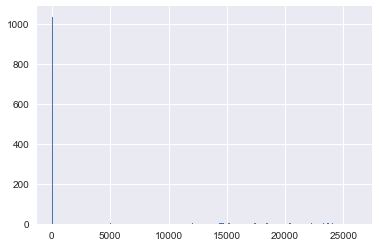

In [51]:
df2.request.hist(bins=200)

### Lets conform it!

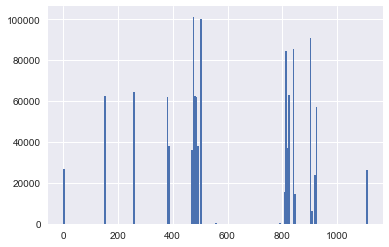

In [52]:
data.time_from_zero_point_mins.hist(bins=200)

### Yes, there exists clear proof to suuport our argument.

### Let's keep moving with our traing data anyway. We'll create lag features and moving average features for predicting for the next minute. Let's have a look at the data first.

In [53]:
df2['index'] = df2.index
df2.head()

,categories,request,index
0,"(0, 1]",5072,0
1,"(1, 2]",6886,1
2,"(2, 3]",5627,2
3,"(3, 4]",4855,3
4,"(4, 5]",4324,4


### We' predict for the (i+1) index's request using 0......i'th index's requests. Creating the outcome.

In [54]:
df2['Outcome'] = df2['request'].shift(-1)

### Creating a few features.

In [55]:
#Moving Average Features
df2['Three_D_MA'] = df2['request'].rolling(3).mean()
df2['Five_D_MA'] = df2['request'].rolling(5).mean()
df2['Ten_D_MA'] = df2['request'].rolling(10).mean()
df2['Twenty_D_MA'] = df2['request'].rolling(20).mean()
df2['Fourty_D_MA'] = df2['request'].rolling(40).mean()
df2['Sixty_D_MA'] = df2['request'].rolling(60).mean()
df2['Hundred_D_MA'] = df2['request'].rolling(100).mean()
df2['OneFourty_D_MA'] = df2['request'].rolling(140).mean()

#Average at every 61 min interval
df2['sixty_one'] = df2.index%61
b = df2.groupby('sixty_one').request.mean().reset_index()

df2 = df2.merge(b,on= 'sixty_one',how='left',)

### There's a lot more possibilities like:

#### - Interaction between moving averages.

#### - count of unique urls, byte codes, etc in the time period.

#### - More trend features other than that of 61 which captures an hour.

#### - Time of day: day, niight, afternoon

#### - etc.

#### But, due to limited time before I have to submit this assignment, I'm having to compromise with that. 

In [56]:
df2.fillna(0,inplace=True)
df2.head()

,categories,request_x,index,Outcome,Three_D_MA,Five_D_MA,Ten_D_MA,Twenty_D_MA,Fourty_D_MA,Sixty_D_MA,Hundred_D_MA,OneFourty_D_MA,sixty_one,request_y
0,"(0, 1]",5072,0,6886.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1441.473684
1,"(1, 2]",6886,1,5627.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1198.473684
2,"(2, 3]",5627,2,4855.0,5861.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,296.210526
3,"(3, 4]",4855,3,4324.0,5789.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,255.526316
4,"(4, 5]",4324,4,0.0,4935.333333,5352.8,0.0,0.0,0.0,0.0,0.0,0.0,4,227.631579


### EDA

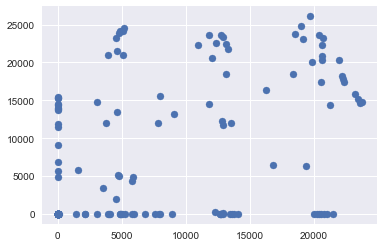

In [57]:
plt.scatter(x = df2.Three_D_MA, y = df2.Outcome)

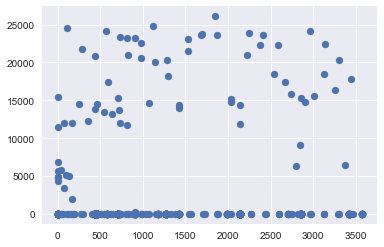

In [58]:
plt.scatter(x = df2.OneFourty_D_MA, y = df2.Outcome)

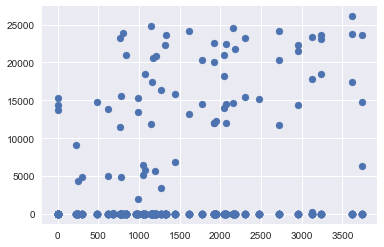

In [59]:
plt.scatter(x = df2.request_y, y = df2.Outcome)

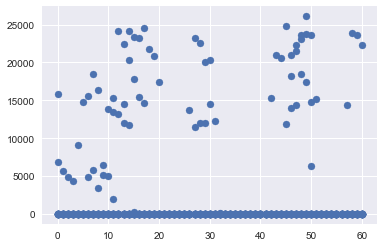

In [60]:
plt.scatter(x = df2.sixty_one, y = df2.Outcome)

### The request_y (mean for every 61 day) has somewhat linear relationship but the moving averages shows severly non-linear behaviour. Therefore, I'm choosing to got with a tree based model (gbm).

### One should use time sliding time window for cross-validation. I'm sticking with that for just 100 last observations.

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
from tqdm import tqdm

model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=1000, subsample=1.0, max_depth=3, random_state=0, max_features="sqrt")

df2['pred'] = -1

for i in tqdm(range(df2.shape[0]-101,df2.shape[0]-2)):
    train = df2[0:i]
    test = df2[i:i+1]
    
    model.fit(train[['request_x', 'Three_D_MA', 'Five_D_MA', 'Ten_D_MA', 'Twenty_D_MA', 'Fourty_D_MA', 'Sixty_D_MA','Hundred_D_MA', 'OneFourty_D_MA', 'sixty_one', 'request_y']],train['Outcome'])
    
    df2.loc[i+1,'pred'] = model.predict(test[['request_x', 'Three_D_MA', 'Five_D_MA', 'Ten_D_MA', 'Twenty_D_MA', 'Fourty_D_MA', 'Sixty_D_MA','Hundred_D_MA', 'OneFourty_D_MA', 'sixty_one', 'request_y']])

    
    

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [00:34<00:00,  2.49it/s]


In [62]:
df2.pred = df2.pred.clip(0,df2.Outcome.max())


df2.loc[df2.shape[0]-101:df2.shape[0]-2,['pred','Outcome']]

,pred,Outcome
1010,0.000000,0.0
1011,1389.125708,0.0
1012,0.000000,0.0
1013,428.901727,0.0
1014,0.000000,0.0
1015,440.624636,0.0
1016,0.000000,0.0
1017,0.000000,0.0
1018,0.000000,0.0
1019,0.000000,0.0


### RMSE for time based sliding woindow based validation set for last 100 observations:

In [63]:

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse(df2.pred[df2.shape[0]-101:df2.shape[0]-2],df2.Outcome[df2.shape[0]-101:df2.shape[0]-2])

876.53845862672472

## 2.B Predict the session length for a given IP


In [64]:

df3 = data.groupby(['client_IP','session_number']).timestamp.agg([np.max,np.min]).reset_index()

In [65]:
df3['IP_session_time_mins'] = (df.amax-df.amin).apply(lambda x: x.total_seconds())/60

df3 = df3.groupby('client_IP').IP_session_time_mins.mean().reset_index()

In [66]:
df3.head()

,client_IP,IP_session_time_mins
0,1.186.101.79,18.633333
1,1.186.103.240,0.183333
2,1.186.103.78,0.150000
3,1.186.108.213,1.883333
4,1.186.108.230,0.316667


In [67]:
df_count_1 = data.groupby(['client_IP'],as_index=False).request.count()

df_count_1.columns = ['client_IP', 'count_ip']

df3 = df3.merge(df_count_1, on = 'client_IP', how = 'left')

df3.fillna(0,inplace = True)

df3.head()

,client_IP,IP_session_time_mins,count_ip
0,1.186.101.79,18.633333,33
1,1.186.103.240,0.183333,7
2,1.186.103.78,0.150000,4
3,1.186.108.213,1.883333,2
4,1.186.108.230,0.316667,5


In [68]:
df_count_2 = data.groupby(['client_IP']).session_number.agg([np.min,np.mean,np.max]).reset_index()

df3 = df3.merge(df_count_2, on = 'client_IP', how = 'left')

df3.fillna(0,inplace = True)

df3.tail()

,client_IP,IP_session_time_mins,count_ip,amin,mean,amax
90539,98.230.153.173,1.450000,71,0,0.830986,1
90540,98.26.49.96,0.116667,3,0,0.000000,0
90541,99.231.50.46,0.066667,2,0,0.000000,0
90542,99.247.104.53,0.216667,2,0,0.000000,0
90543,99.8.170.3,0.000000,1,0,0.000000,0


### One can create several other features. But for the sake of demonstration only, I'll use max, min and mean of no. of sessions and total frequency only.

## EDA

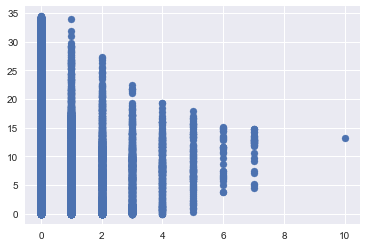

In [69]:

plt.scatter(x = df3.amax, y = df3.IP_session_time_mins)

### Linear mode not suitable due to heteroskedasticity and non linear relation between independenta and dependent variables. 

### We'll be using GBM. And create a validation set of randomly choosen 20% IP addresses



In [70]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

train, test = train_test_split(df3, test_size = 0.2)

model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=1000, subsample=1.0, max_depth=2, random_state=0, max_features="auto")

model.fit(train[[ 'count_ip', 'mean', 'amax']],train['IP_session_time_mins'])

test['pred'] = model.predict(test[[ 'count_ip', 'mean', 'amax']])

    
    

C:\Users\dell\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [71]:
test.pred = test.pred.clip(0,train.IP_session_time_mins.max())

C:\Users\dell\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### Let's check out the RMSE for the predictions on the test [20% IP appdesses]

In [72]:


def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse(test.pred,test.IP_session_time_mins)

4.61027041419129

## 2.C Predict the number of unique URL visits by a given IP

#### NOTE: {Assumption: Predict the number of unique URL visits by a given IP (in one session i.e per session on average)}

### Let's use the first sessions (session_number = 0) of all client id's as our traing data and all successive sessions (session_number>0) as our test data

In [73]:
df4 = data.groupby(['client_IP','session_number']).url.nunique().reset_index()

train = df4[df4.session_number==0]

test = df4[df4.session_number>0]



In [74]:
train.head()

,client_IP,session_number,url
0,1.186.101.79,0,12
1,1.186.103.240,0,5
2,1.186.103.78,0,4
3,1.186.108.213,0,2
4,1.186.108.230,0,5


In [75]:
test.head()

,client_IP,session_number,url
39,1.186.180.183,1,4
65,1.186.247.60,1,1
66,1.186.247.60,2,3
68,1.186.248.29,1,16
73,1.186.28.220,1,3


In [76]:
big_data_train = data[data.session_number==0]

big_data_test = data[data.session_number>0]

df_count_2 = big_data_train.groupby(['client_IP']).sent_bytes.agg([np.min,np.mean,np.max,np.std]).reset_index()

train = train.merge(df_count_2, on = 'client_IP', how = 'left')

test = test.merge(df_count_2, on = 'client_IP', how = 'left')

train.fillna(0,inplace=True)

test.fillna(0,inplace=True)

train.head()

,client_IP,session_number,url,amin,mean,amax,std
0,1.186.101.79,0,12,17.0,2342.636364,14186.0,4489.061774
1,1.186.103.240,0,5,60.0,4573.285714,14192.0,6582.988650
2,1.186.103.78,0,4,217.0,3971.500000,13989.0,6689.577989
3,1.186.108.213,0,2,17.0,419.000000,821.0,568.513852
4,1.186.108.230,0,5,230.0,5971.800000,14188.0,7507.130557


### Using only the min, mean, max and std of sent_bytes for demonstration. Infact, we can use multiple features like:

### - min, mean, max and std of backend processing time

### - min, mean, max and std of response processing time

### - min, mean, max and std of received_bytes

### - proportion of sucessul backend status code for given IP

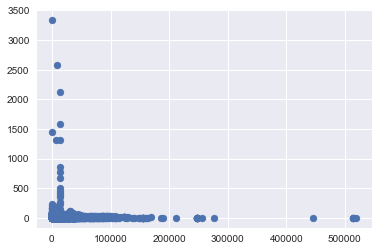

In [77]:
plt.scatter(x = train['mean'],y = train['url'])

### Interesting! more than 1000 unique urls in single sessions

### Linear mode not suitable due to non linear relation between independent and dependent variables. 

### We'll be using GBM. 



In [78]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=1000, subsample=1.0, max_depth=2, random_state=0, max_features="auto")

model.fit(train[[ 'amin', 'std', 'mean', 'amax']],train['url'])

test['pred'] = model.predict(test[['amin', 'std', 'mean', 'amax']])

    
    

### Let's check out the RMSE for the predictions on the test data

In [79]:
test.pred = test.pred.clip(0,train.url.max())

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse(test.pred,test.url)

143.54712172798887

In [80]:
test[['url','pred']].tail(10)

,url,pred
15193,7,12.072095
15194,3,1.009912
15195,1,1.009912
15196,3,2.068156
15197,7,4.988525
15198,1,1.009912
15199,1,1.009912
15200,2,1.009912
15201,1,1.009912
15202,59,9.763634


## Imp. Note: Almost all the features stated just above can be used for all the three predicting tasks. Please note that during the course of this assignment, my focus has been to create the first cut of each of 3 modelling tasks and 4 slicing and dicing tasks. Models can ofcourse be futher improved by using additional features that has been stated, parameter tuning, etc but I have kept it away from the scope of this project due to the time constraints. 

## Thanks.